In [10]:
pip install hopsworks


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
import hopsworks




In [12]:
# Step 1: Login to Hopsworks
project = hopsworks.login()

# Step 2: Access the Feature Store
fs = project.get_feature_store()




Connection closed.
Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1043607
Connected. Call `.close()` to terminate connection gracefully.


In [13]:


# Step 3: Read Data from the Feature Group
city_weather_fg = fs.get_feature_group(name="city_weather", version=1)
city_weather_df = city_weather_fg.read()

Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (2.81s) 


In [14]:
# Step 4: Check the Data
print(city_weather_df.head(5))

   index     city_id        date  hour  temp  wind_speed    description  \
0   5139  C-451776b7  2019-01-31     2  54.0           1  Partly cloudy   
1  42559  C-d9e9d934  2019-01-27     6  37.0           2  Partly cloudy   
2   5526  C-d80a1e7d  2019-01-01     5  39.0          10       Overcast   
3   3910  C-4fe0fa24  2019-01-25    21  43.0           6          Clear   
4  29577  C-b25a09de  2019-02-07     8  52.0           1           Mist   

   precip  humidity  visibility  pressure  chanceofrain  chanceoffog  \
0     0.0      93.0           6    1014.0             0            0   
1     0.0      69.0           6    1022.0             0            0   
2     0.0      85.0           6    1021.0             0            0   
3     0.0      58.0           6    1019.0             0            0   
4     0.0      97.0           6    1016.0             0            0   

   chanceofsnow  chanceofthunder            date_time  event_date  
0             0                0  2019-01-31 02:

In [15]:
city_weather_df.dtypes

index                int64
city_id             object
date                object
hour                 int64
temp               float64
wind_speed           int64
description         object
precip             float64
humidity           float64
visibility           int64
pressure           float64
chanceofrain         int64
chanceoffog          int64
chanceofsnow         int64
chanceofthunder      int64
date_time           object
event_date          object
dtype: object

In [16]:
# Descriptive statistics for numerical features
numerical_summary = city_weather_df.describe()
print(numerical_summary)


              index          hour          temp    wind_speed   precip  \
count  55176.000000  55176.000000  55176.000000  55176.000000  55176.0   
mean   27588.500000     11.500000     36.848911      7.859305      0.0   
std    15928.083563      6.922249     21.439820      4.254451      0.0   
min        1.000000      0.000000    -14.500000      0.000000      0.0   
25%    13794.750000      5.750000     23.000000      5.000000      0.0   
50%    27588.500000     11.500000     34.000000      7.000000      0.0   
75%    41382.250000     17.250000     48.000000     11.000000      0.0   
max    55176.000000     23.000000     85.500000     20.000000      0.0   

           humidity  visibility      pressure  chanceofrain  chanceoffog  \
count  55176.000000     55176.0  55176.000000       55176.0      55176.0   
mean      70.831747         6.0   1019.397165           0.0          0.0   
std       21.008725         0.0      8.436851           0.0          0.0   
min       10.500000         6

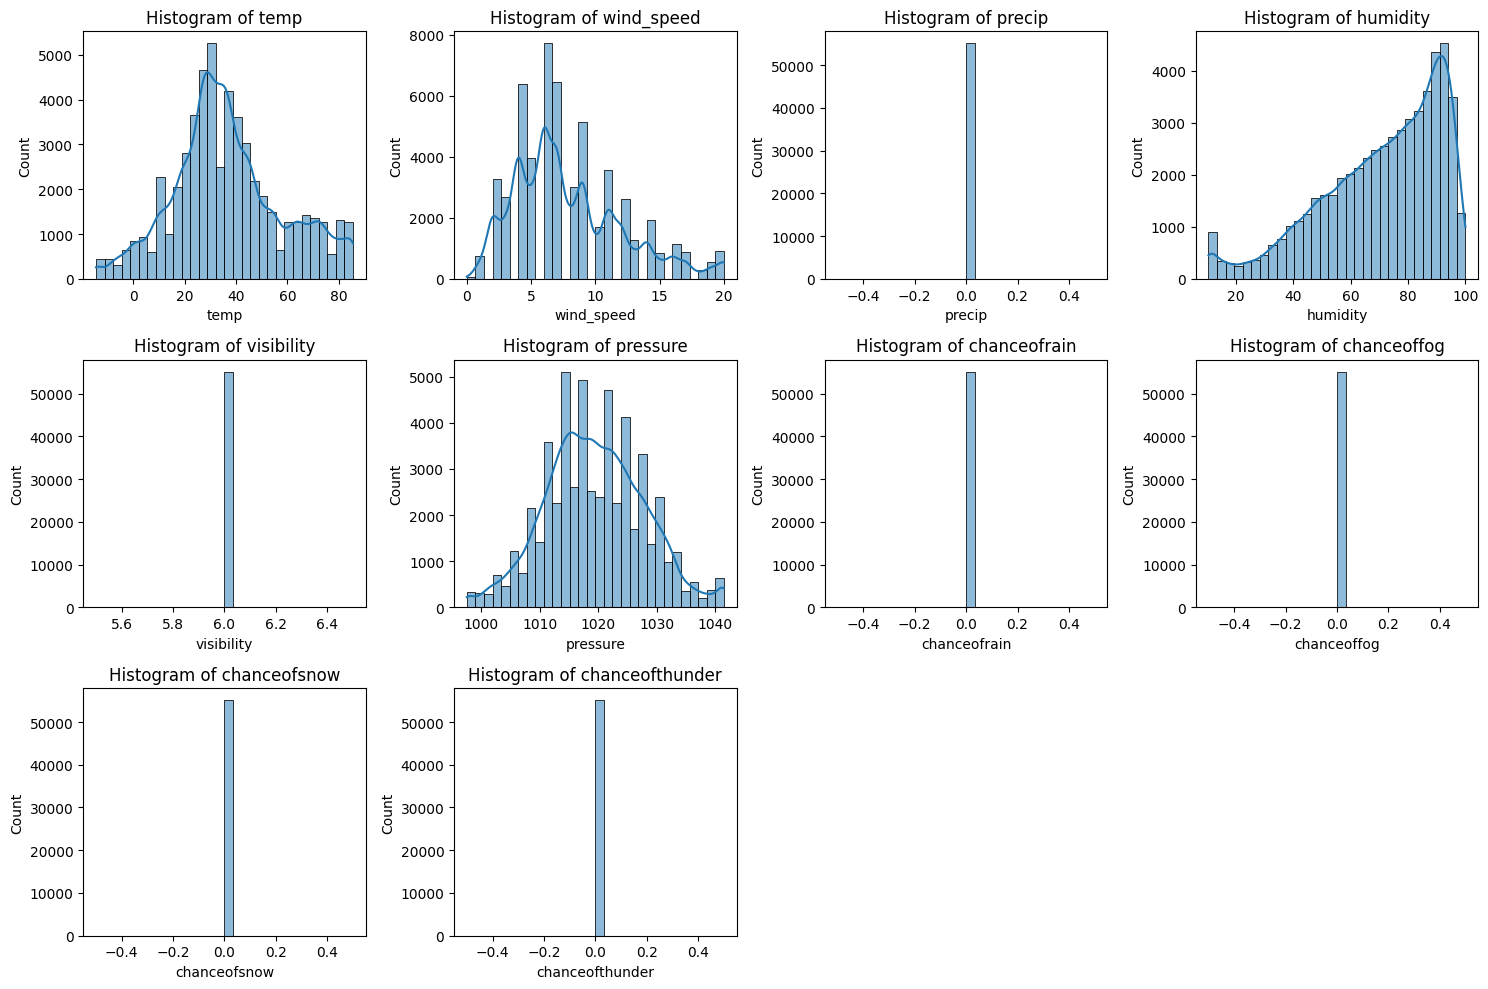

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numeric columns to plot
numeric_columns = ['temp', 'wind_speed', 'precip', 'humidity', 'visibility', 'pressure', 
                   'chanceofrain', 'chanceoffog', 'chanceofsnow', 'chanceofthunder']

# Plot histograms
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(city_weather_df[column], bins=30, kde=True)  # Use city_weather[column]
    plt.title(f'Histogram of {column}')
plt.tight_layout()
plt.show()


Temperature (temp): Distribution may be normally shaped, indicating typical temperature ranges for the cities.

Wind Speed (wind_speed): May show a right-skewed distribution, suggesting most values are lower with few high-speed winds.

Precipitation (precip): Could show a wide range, with many zeros indicating no precipitation days.

Humidity (humidity): May indicate high humidity levels common in certain climates.

Visibility (visibility): Should be generally high, but check for any low visibility occurrences.

Pressure (pressure): Should show a stable range, but check for outliers.

Chance of Rain, Fog, Snow, Thunder: These variables may have many zeros, reflecting rare weather events.

Recommendations from Visualization

Temperature and Humidity: If temperature and humidity have a strong correlation, consider their combined effect on comfort and weather predictions.


Temperature and Humidity Correlation

Correlation between Temperature and Humidity: -0.3107017010542908


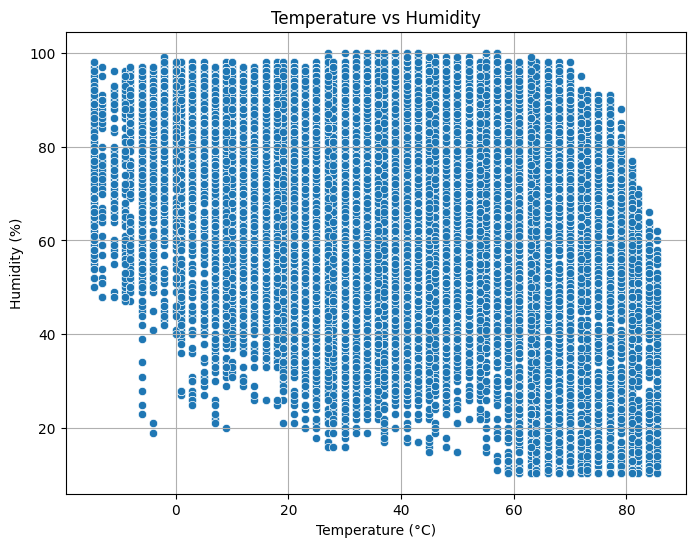

In [18]:
# Calculate correlation
correlation = city_weather_df[['temp', 'humidity']].corr().iloc[0, 1]
print(f"Correlation between Temperature and Humidity: {correlation}")

# Visualize the relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(data=city_weather_df, x='temp', y='humidity')
plt.title('Temperature vs Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.grid()
plt.show()


Correlation Coefficient: The correlation coefficient of -0.32 indicates a moderate negative correlation between temperature and humidity. This suggests that, generally, as temperature increases, humidity tends to decrease, or vice versa.

2. Precipitation Analysis

#Investigate Precipitation

Shape of high_precip DataFrame: (0, 17)
First few rows of high_precip DataFrame:
Empty DataFrame
Columns: [index, city_id, date, hour, temp, wind_speed, description, precip, humidity, visibility, pressure, chanceofrain, chanceoffog, chanceofsnow, chanceofthunder, date_time, event_date]
Index: []


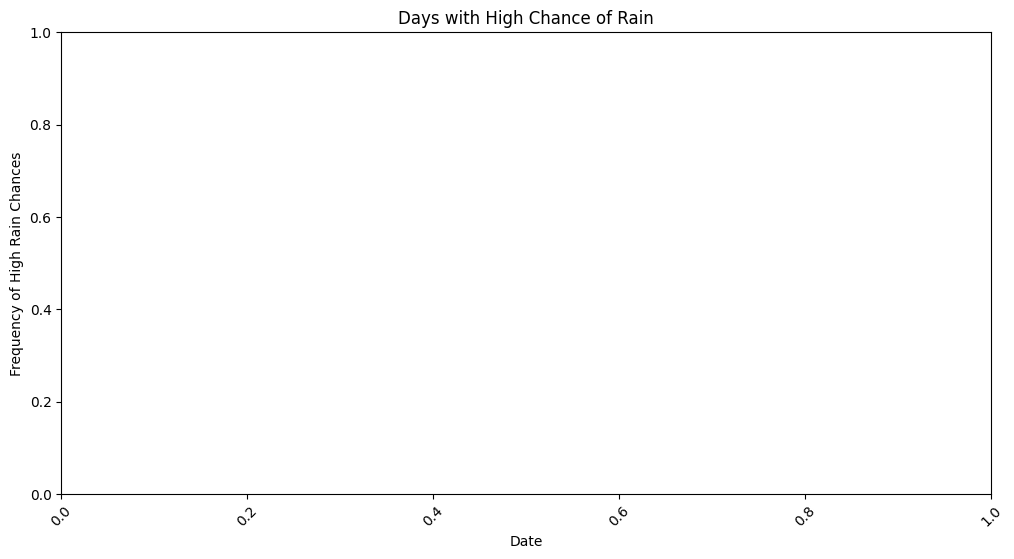

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming city_weather DataFrame is already defined and chanceofrain is properly formatted

# Convert 'chanceofrain' to numeric, forcing errors to NaN
city_weather_df['chanceofrain'] = pd.to_numeric(city_weather_df['chanceofrain'], errors='coerce')

# Filter data for high chances of rain
high_precip = city_weather_df[city_weather_df['chanceofrain'] > 0]  # Lower threshold for testing

# Print the shape and head of the filtered DataFrame
print("Shape of high_precip DataFrame:", high_precip.shape)
print("First few rows of high_precip DataFrame:")
print(high_precip.head())

# Visualize periods with high precipitation
plt.figure(figsize=(12, 6))
sns.countplot(data=high_precip, x='date', order=high_precip['date'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Days with High Chance of Rain')
plt.xlabel('Date')
plt.ylabel('Frequency of High Rain Chances')
plt.show()


In [20]:
print(city_weather_df['chanceofrain'].dtype)
# Print unique values in chanceofrain
print("Unique values in chanceofrain:", city_weather_df['chanceofrain'].unique())


int64
Unique values in chanceofrain: [0]


In [21]:
# Step 1: Login to Hopsworks
project = hopsworks.login()

# Step 2: Access the Feature Store
fs = project.get_feature_store()


Connection closed.
Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1043607
Connected. Call `.close()` to terminate connection gracefully.


In [22]:


# Step 3: Read Data from the Feature Group
drivers_fg = fs.get_feature_group(name="drivers", version=1)
drivers_df = drivers_fg.read()


Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (1.16s) 


In [23]:
# Step 4: Check the Data
print(drivers_df.head(5))

   index   driver_id              name gender  age  experience driving_style  \
0    775  58795b63-6  Dennis Fernandez   male   46          10  conservative   
1    640  c16ebc3b-5       Troy Wagner   male   48          12     proactive   
2   1022  1ccd859d-a     Joseph Sawyer   male   41          11     proactive   
3    784  734ffab2-0     Carlos Porter   male   47           3  conservative   
4    807  a897204e-a     Thomas Rogers   male   47          25     proactive   

   ratings    vehicle_no  average_speed_mph                event_date  
0        7  2.622573e+07              46.38 2024-09-24 00:00:00+00:00  
1        4  3.227424e+07              63.19 2024-09-24 00:00:00+00:00  
2        6  4.999147e+07              59.36 2024-09-24 00:00:00+00:00  
3        2  2.845007e+07              45.65 2024-09-24 00:00:00+00:00  
4        4  2.019439e+07              63.49 2024-09-24 00:00:00+00:00  


In [24]:
drivers_df.dtypes

index                              int64
driver_id                         object
name                              object
gender                            object
age                                int64
experience                         int64
driving_style                     object
ratings                            int64
vehicle_no                       float64
average_speed_mph                float64
event_date           datetime64[us, UTC]
dtype: object

Histogram Plots for Numeric Features - to observe the distribution of values in the dataset

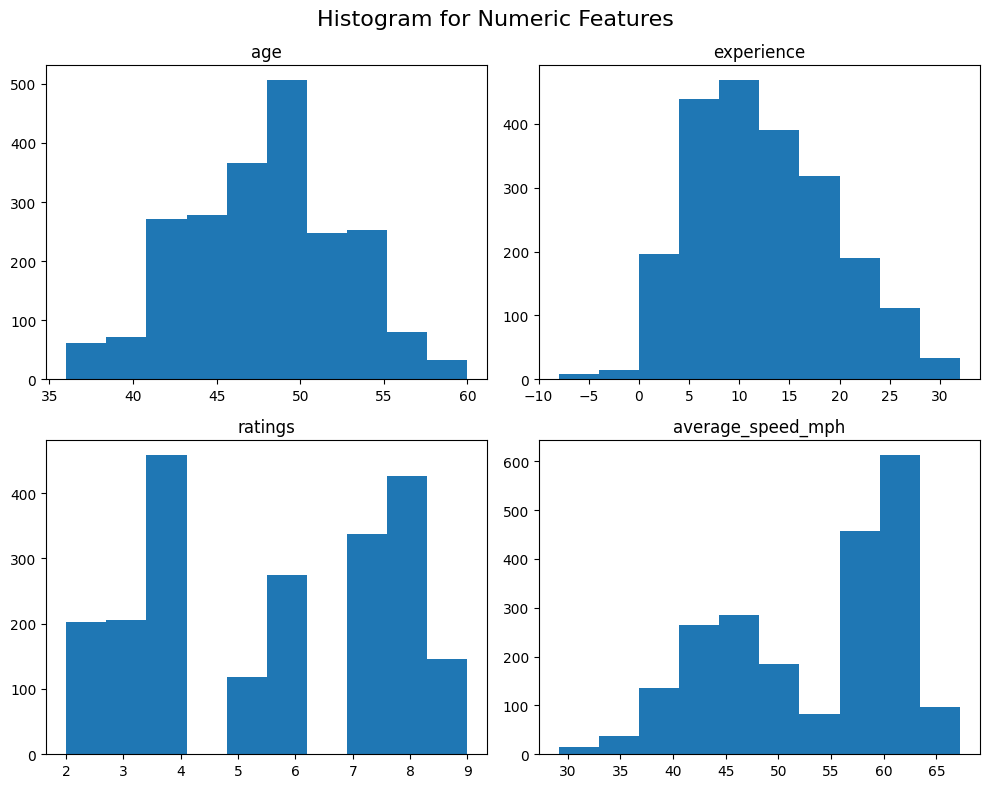

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numeric columns
numeric_features = ['age', 'experience', 'ratings', 'average_speed_mph']
drivers_df[numeric_features].hist(bins=10, figsize=(10, 8), grid=False)
plt.suptitle('Histogram for Numeric Features', fontsize=16)
plt.tight_layout()
plt.show()


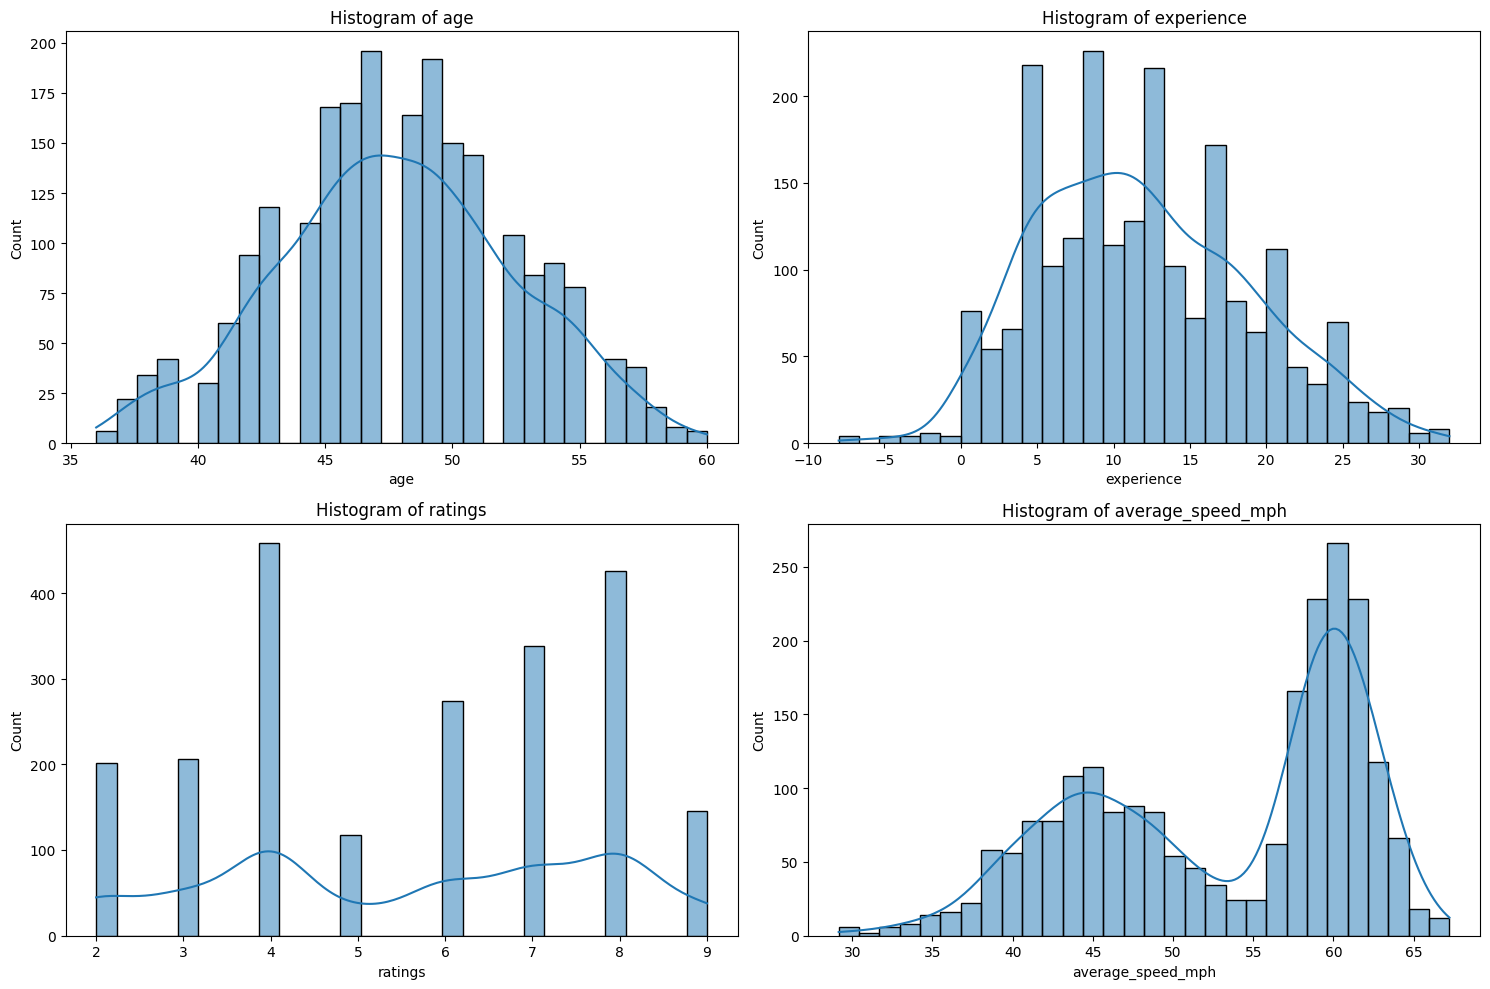

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram plots for numeric features
numeric_columns = ['age', 'experience', 'ratings', 'average_speed_mph']

plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(drivers_df[column], bins=30, kde=True)
    plt.title(f'Histogram of {column}')
plt.tight_layout()
plt.show()




Observations:

Age: Most drivers fall between 40-55 years old, indicating a mature driving demographic.

Experience: The distribution is right-skewed, suggesting many drivers have around 10-20 years of experience, with fewer drivers having less or more experience.

Ratings: Ratings appear to be concentrated at the higher end, indicating generally positive reviews of drivers.

Average Speed: The distribution is also right-skewed, with most drivers averaging speeds between 30-60 mph.

Recommendations


Correlate features: Perform a correlation analysis between ratings, experience, and average speed to determine if any of these features significantly impact driver performance.

Targeted training: Use insights from experience and rating distributions to create targeted training programs for different driver groups (e.g., younger or less experienced drivers).

Outlier management: Investigate outliers in both the speed and ratings distributions. Outliers in average speed could be safety risks, while outliers in ratings may indicate customer service issues.

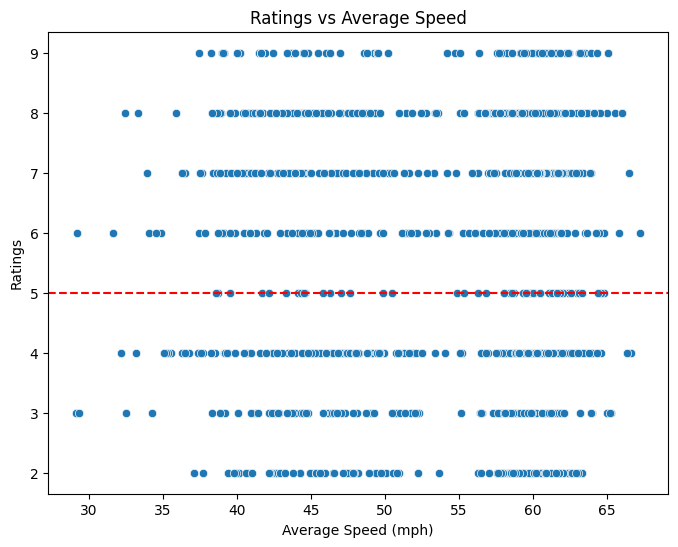

In [27]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='average_speed_mph', y='ratings', data=drivers_df)
plt.title('Ratings vs Average Speed')
plt.xlabel('Average Speed (mph)')
plt.ylabel('Ratings')
plt.axhline(y=5, color='r', linestyle='--')  # Reference line at average rating
plt.show()


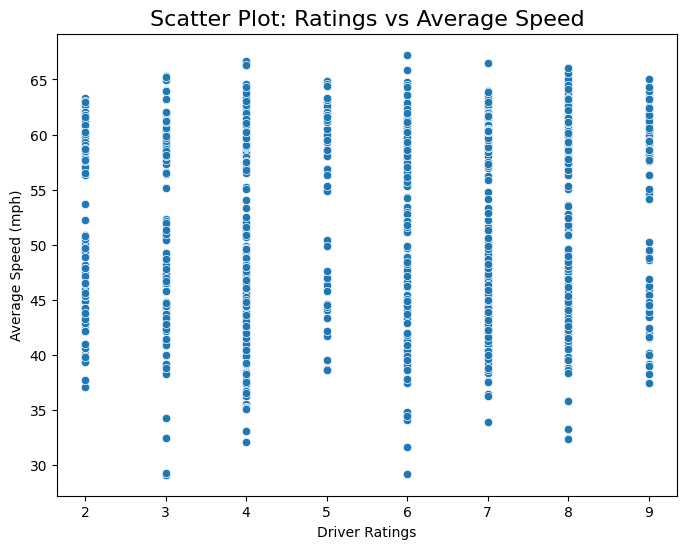

In [28]:
# Scatter plot: Ratings vs. Average Speed
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ratings', y='average_speed_mph', data=drivers_df)
plt.title('Scatter Plot: Ratings vs Average Speed', fontsize=16)
plt.xlabel('Driver Ratings')
plt.ylabel('Average Speed (mph)')
plt.show()


Observations


Clustering: There seem to be distinct clusters of data points around certain driver ratings. This suggests that drivers with similar ratings tend to have similar average speeds.

Correlation: There appears to be a weak positive correlation between driver ratings and average speed. This means that, generally, drivers with higher ratings tend to have slightly higher average speeds. However, the correlation is not strong, indicating that other factors might also influence average speed.

Outliers: A few data points, particularly those with lower average speeds and higher ratings, might be considered outliers. These could be due to various reasons, such as short trips, traffic conditions, or specific driving styles.

Recommendations

Data Preprocessing:

Outlier Detection: Consider using statistical methods or machine learning techniques to identify and potentially remove outliers, as they can skew the model's learning.
Normalization: If the features (driver ratings and average speed) have significantly different scales, normalization can help improve model performance.

Feature Engineering:

Interaction Terms: Explore creating interaction terms between driver ratings and other relevant features (e.g., trip duration, distance, time of day) to capture more complex relationships.
Categorical Features: If there are categorical features (e.g., driver experience level, vehicle type), consider encoding them appropriately (e.g., one-hot encoding, label encoding).

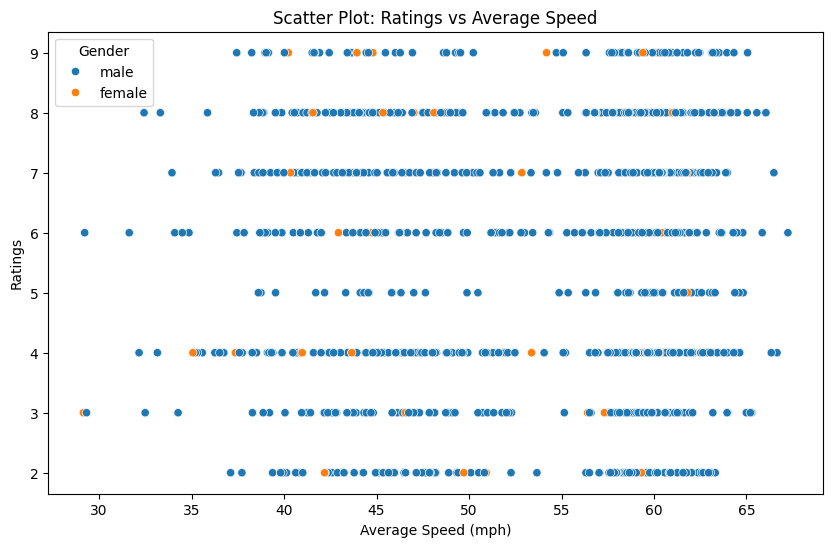

In [29]:
# Scatter Plot: Ratings vs Average Speed
plt.figure(figsize=(10, 6))
sns.scatterplot(data=drivers_df, x='average_speed_mph', y='ratings', hue='gender')
plt.title('Scatter Plot: Ratings vs Average Speed')
plt.xlabel('Average Speed (mph)')
plt.ylabel('Ratings')
plt.legend(title='Gender')
plt.show()



Gender Differences:

Overlapping Distributions: The data points for male and female drivers overlap quite a bit, suggesting that gender alone does not explain a large portion of the variation in average speed.

Slight Variation: There might be a slight tendency for female drivers to have slightly higher average speeds compared to male drivers, particularly in the higher rating ranges. However, this observation is not very strong and could be influenced by other factors.

Other Observations:

Clustering: There seem to be clusters of data points around certain average speed values, indicating that some drivers tend to maintain consistent speeds.

Outliers: A few data points, particularly those with lower average speeds and higher ratings, might be considered outliers. These could be due to various factors such as short trips, traffic conditions, or specific driving styles.

Recommendations

Consider additional factors: Explore other factors that might influence average speed, such as trip distance, time of day, traffic conditions, or vehicle type.

Statistical analysis: Conduct statistical tests to quantify the relationship between driver ratings, average speed, and gender.

Machine learning: Build a machine learning model to predict average speed based on driver ratings and other relevant features.

Visualization: Create additional visualizations, such as histograms or box plots, to gain further insights into the data distribution.

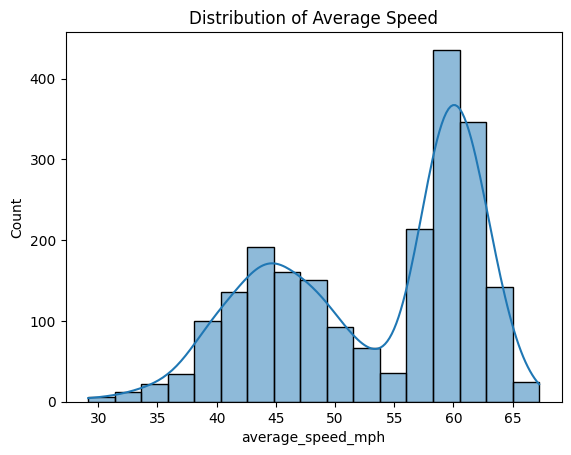

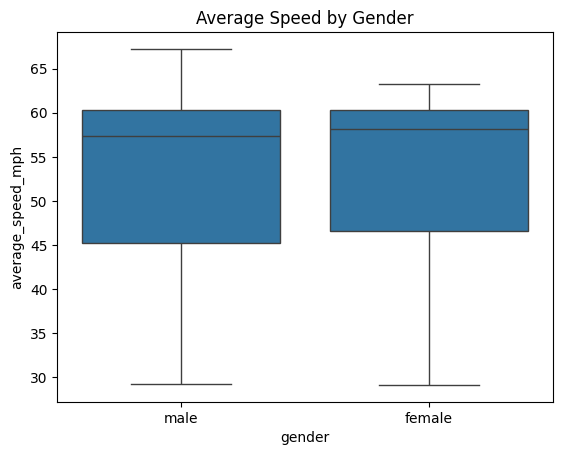

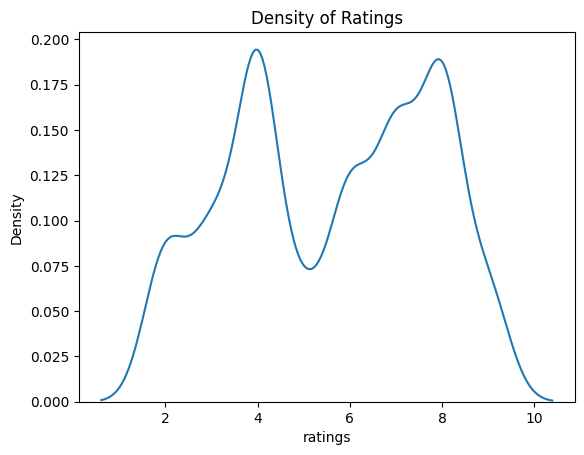

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram of average speed
sns.histplot(data=drivers_df, x='average_speed_mph', kde=True)
plt.title('Distribution of Average Speed')
plt.show()

# Box plot of average speed by gender
sns.boxplot(data=drivers_df, x='gender', y='average_speed_mph')
plt.title('Average Speed by Gender')
plt.show()

# Density plot of ratings
sns.kdeplot(data=drivers_df, x='ratings')
plt.title('Density of Ratings')
plt.show()

In [31]:
print(drivers_df.columns)


Index(['index', 'driver_id', 'name', 'gender', 'age', 'experience',
       'driving_style', 'ratings', 'vehicle_no', 'average_speed_mph',
       'event_date'],
      dtype='object')


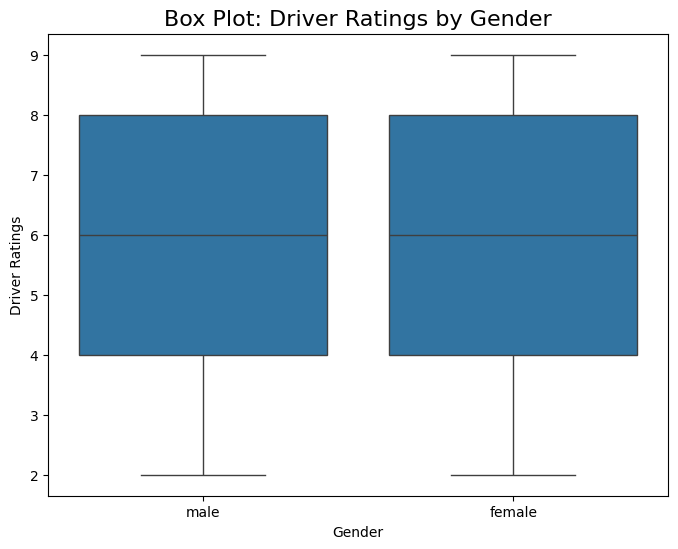

In [32]:
# Box plot: Driver Ratings by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='ratings', data=drivers_df)
plt.title('Box Plot: Driver Ratings by Gender', fontsize=16)
plt.xlabel('Gender')
plt.ylabel('Driver Ratings')
plt.show()


Understanding the Plot:

The provided box plot visually compares the distribution of driver ratings between male and female drivers. The x-axis represents the gender categories (male and female), and the y-axis represents the driver ratings. The box plot elements include the median (the horizontal line within the box), the interquartile range (the box itself), the whiskers (the lines extending from the box), and the outliers (individual data points outside the whiskers).



Key Observations:

Median Ratings: The median ratings for both male and female drivers appear to be very similar, suggesting that there is no significant difference in the central tendency of ratings between the two genders.
Interquartile Range: The interquartile ranges for male and female drivers also seem to be comparable, indicating that the spread of ratings within the middle 50% of the data is similar for both genders.
Outliers: There are a few outliers visible in both groups, particularly on the lower end of the rating scale. These outliers might represent drivers with unusually low ratings.
Distribution Shape: The overall shape of the box plots is relatively similar for both genders, suggesting that the distributions of ratings are comparable.

Implications:

No Significant Gender Difference: Based on this box plot, there is no strong evidence to suggest a significant difference in driver ratings between male and female drivers.
Outlier Analysis: The presence of outliers, particularly on the lower end, warrants further investigation to understand the reasons for these unusually low ratings.
Additional Factors: While gender does not appear to have a major impact on ratings, other factors such as driving experience, driving style, or specific driving incidents might influence ratings.

Further Analysis:

Statistical Tests: Conduct statistical tests (e.g., t-test) to quantify the difference in ratings between male and female drivers and assess its statistical significance.
Outlier Analysis: Identify and analyze potential outliers to understand their impact on the overall distribution.
Consider Additional Factors: Explore the relationship between ratings and other variables (e.g., average speed, driving experience) to gain a more comprehensive understanding of the factors influencing driver ratings.

Trucks

In [33]:
# Step 1: Login to Hopsworks
project = hopsworks.login()

# Step 2: Access the Feature Store
fs = project.get_feature_store()




Connection closed.
Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1043607
Connected. Call `.close()` to terminate connection gracefully.


In [34]:
# Step 3: Read Data from the Feature Group
trucks_fg = fs.get_feature_group(name="trucks", version=1)
trucks_df = trucks_fg.read()


Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (0.83s) 


In [35]:
# Step 4: Check the Data
print(trucks_df.head(5))

   index  truck_id  truck_age  load_capacity_pounds  mileage_mpg fuel_type  \
0   1073  30978201         11               10000.0           18    diesel   
1   1194  27199418         10                6000.0           13       gas   
2    728  21032614         11               10000.0           19       gas   
3    611  25155294          9               15000.0           28    diesel   
4    696  88819781          8               15000.0           19       gas   

                 event_date  
0 2024-09-25 00:00:00+00:00  
1 2024-09-25 00:00:00+00:00  
2 2024-09-25 00:00:00+00:00  
3 2024-09-25 00:00:00+00:00  
4 2024-09-25 00:00:00+00:00  


In [36]:
trucks_df.dtypes

index                                 int64
truck_id                              int64
truck_age                             int64
load_capacity_pounds                float64
mileage_mpg                           int64
fuel_type                            object
event_date              datetime64[us, UTC]
dtype: object

In [37]:
# Descriptive Statistics
print(trucks_df.describe())

             index      truck_id    truck_age  load_capacity_pounds  \
count  1300.000000  1.300000e+03  1300.000000           1300.000000   
mean    650.500000  3.263242e+07     9.513077           8610.619469   
std     375.421985  2.205390e+07     2.039030           5459.878140   
min       1.000000  1.000839e+07     3.000000           3000.000000   
25%     325.750000  1.817244e+07     8.000000           4000.000000   
50%     650.500000  2.584212e+07    10.000000           6000.000000   
75%     975.250000  3.340052e+07    11.000000          15000.000000   
max    1300.000000  9.998167e+07    15.000000          20000.000000   

       mileage_mpg  
count  1300.000000  
mean     20.784615  
std       3.655876  
min      11.000000  
25%      18.000000  
50%      21.000000  
75%      24.000000  
max      29.000000  


Observations

Truck Age: The average age of the trucks is approximately 9.5 years, with a minimum of 3 years and a maximum of 15 years. This indicates a relatively mature fleet. The standard deviation of about 2 years suggests that most trucks are clustered around the average age.

Load Capacity: The mean load capacity is about 8610 pounds, with a significant range from 3000 pounds (minimum) to 20000 pounds (maximum).
The interquartile range (IQR) indicates that 50% of trucks have a load capacity between 4000 pounds and 15000 pounds. This wide range may suggest the presence of specialized trucks or varied operational needs.

Mileage: The average mileage is approximately 20.8 mpg, with a minimum of 11 mpg and a maximum of 29 mpg.
The standard deviation of about 3.7 mpg indicates moderate variability in fuel efficiency among the trucks, with most trucks performing within a reasonable range around the average.

Recommendations

Fleet Review: Given the average age of 9.5 years, consider assessing the condition and efficiency of older trucks. A phased replacement strategy could be beneficial for maintaining operational efficiency and reducing maintenance costs.

Optimize Load Assignments: With a wide range in load capacities, evaluate how trucks are assigned loads. Ensure that trucks are utilized according to their capacity to optimize performance and fuel efficiency.

Fuel Efficiency Training: Since there is variability in mileage, consider implementing training programs for drivers focused on fuel-efficient driving techniques. This could help improve overall fleet mileage and reduce fuel costs.

Investigate Outliers: Investigate the lower mileage trucks (e.g., those around 11 mpg) to determine if they require maintenance or if their use can be optimized. Additionally, look into the trucks with high load capacities to ensure they are not being overloaded, which can affect performance and safety.

Consider Alternative Fuels: If certain fuel types are prevalent in the fleet, explore transitioning to more sustainable fuel options or optimizing the current fuel sourcing to reduce costs and environmental impact.

# Visualizations
# Histogram for Numeric Features

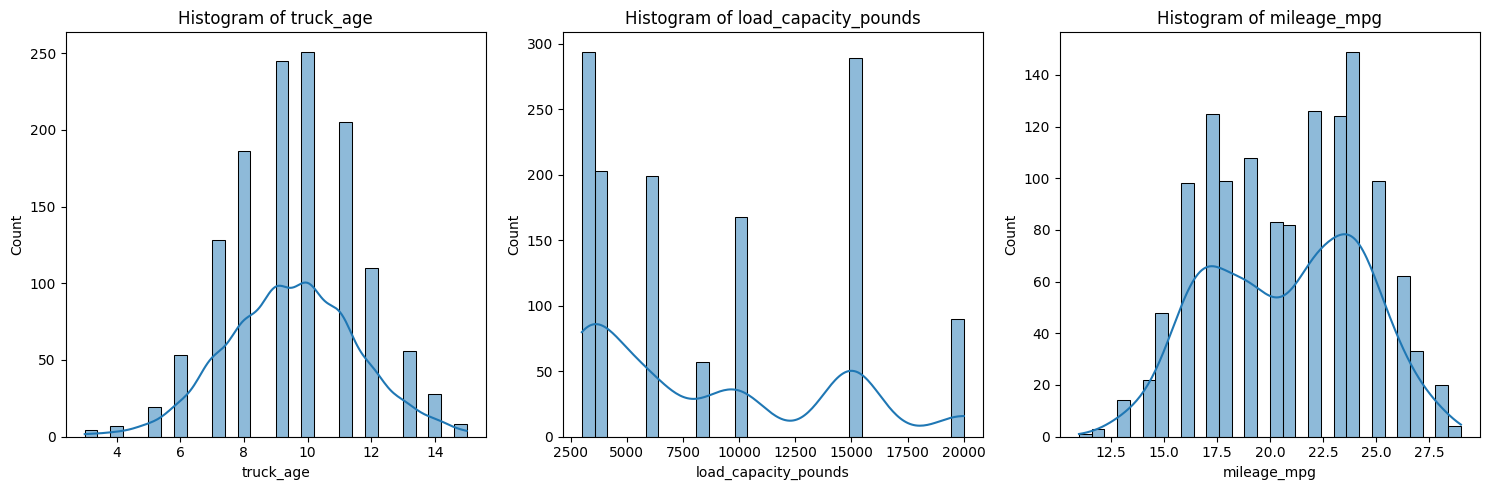

In [38]:
# Visualizations
# Histogram for Numeric Features
numeric_columns = ['truck_age', 'load_capacity_pounds', 'mileage_mpg']

plt.figure(figsize=(15, 5))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(1, 3, i)
    sns.histplot(trucks_df[column], bins=30, kde=True)
    plt.title(f'Histogram of {column}')

plt.tight_layout()
plt.show()

Histogram of Truck Age:

Skewness: The distribution is slightly skewed to the right, indicating that there are a few older trucks, but the majority of trucks are relatively new.
Mode: The most common truck age seems to be around 6-8 years.
Range: The age range of trucks appears to be from around 0 to 14 years.

Histogram of Load Capacity (Pounds):

Distribution: The distribution is roughly bell-shaped, suggesting a normal distribution with most trucks having load capacities around the mean.
Range: The load capacity ranges from approximately 0 to 20,000 pounds, with a concentration between 5,000 and 15,000 pounds.
Outliers: There are a few outliers visible on the higher end of the distribution, indicating that some trucks have significantly higher load capacities.

Histogram of Mileage (MPG):

Skewness: The distribution is slightly skewed to the right, indicating that there are a few trucks with lower mileage (potentially older trucks or those with less efficient engines).
Mode: The most common mileage range seems to be around 15-20 MPG.
Range: The mileage ranges from approximately 12 to 27 MPG.


Recommendations: 

Correlation Analysis: Explore the correlation between truck age, load capacity, and mileage to understand how these factors are related.

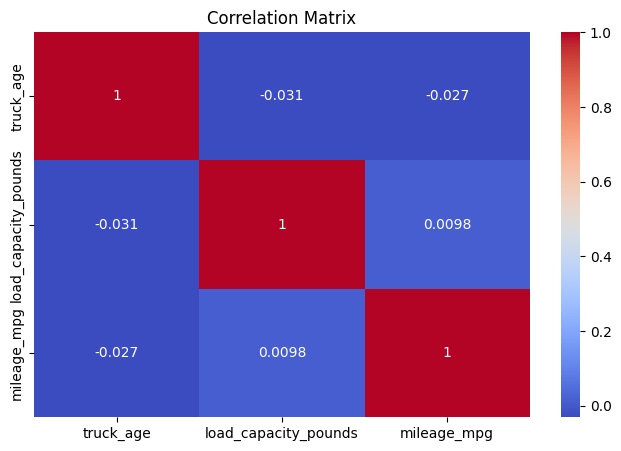

In [39]:
# Correlation Analysis
correlation_matrix = trucks_df[['truck_age', 'load_capacity_pounds', 'mileage_mpg']].corr()
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Key Observations:

Truck Age and Load Capacity: There is a weak negative correlation (-0.031) between truck_age and load_capacity_pounds. This suggests that older trucks might have slightly lower load capacities, but the relationship is not strong.

Truck Age and Mileage: There is a slightly stronger negative correlation (-0.027) between truck_age and mileage_mpg. This indicates that older trucks tend to have slightly lower fuel efficiency.

Load Capacity and Mileage: There is a very weak positive correlation (0.0098) between load_capacity_pounds and mileage_mpg. This suggests that there is a negligible relationship between load capacity and fuel efficiency.

Implications:

Truck Age and Maintenance: The negative correlation between truck age and load capacity and mileage suggests that older trucks might require more maintenance or have reduced performance.

Fuel Efficiency: The negative correlation between truck age and mileage indicates that older trucks might be less fuel-efficient. This could be due to factors such as engine wear or outdated technology.

Load Capacity and Fuel Efficiency: The negligible correlation between load capacity and mileage suggests that the load a truck carries does not have a significant impact on its fuel efficiency.

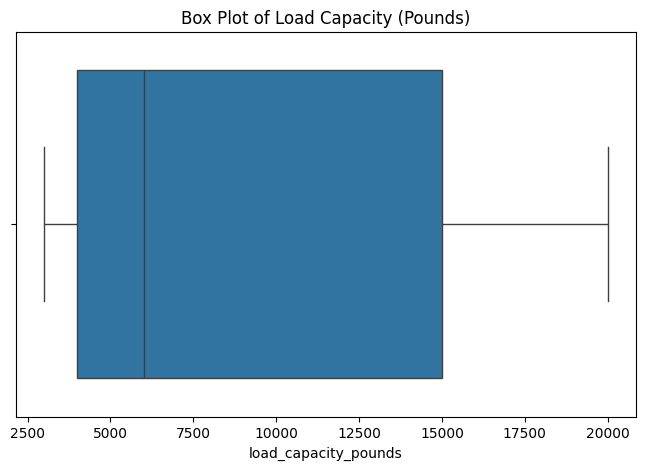

In [40]:

# Box Plot for Load Capacity
plt.figure(figsize=(8, 5))
sns.boxplot(x=trucks_df['load_capacity_pounds'])
plt.title('Box Plot of Load Capacity (Pounds)')
plt.show()


Elements of the Box Plot:

Center Line: The horizontal line within the box represents the median load capacity. This indicates that half of the trucks have load capacities below this value and the other half have capacities above it.

Box: The box represents the interquartile range (IQR), which encompasses the middle 50% of the data. The height of the box reflects the spread of data within this middle range.

Whiskers: The lines extending from the box are the whiskers. They typically extend to the most extreme data points within 1.5 times the IQR from the median. Data points beyond the whiskers are considered outliers.

Outliers: Outliers are individual data points that fall outside the whiskers. These could represent trucks with significantly higher or lower load capacities compared to the majority of trucks.

Observations from the Box Plot:

Center Line: The position of the center line along the y-axis indicates the central tendency of load capacities.

Box Height: The height of the box reflects how spread out the middle 50% of the load capacities are. A taller box suggests more variation in capacities within this middle range.

Whiskers: The length of the whiskers indicates how far the typical data points extend from the IQR. Short whiskers suggest that most data points are clustered close to the median and IQR.

Outliers: The presence of outliers (if any) can indicate trucks with exceptional load capacities, potentially due to their design or purpose.

Interpretations:

By analyzing the relative positions of the center line, box, whiskers, and outliers, you can gain insights into:
Whether the majority of trucks have similar load capacities or there's a significant variation.
The presence of extremely high or low capacity trucks that might require special considerations.

Further Analysis:

Comparison with Other Variables: Explore how load capacity relates to other truck characteristics, such as truck age or fuel type. This can be done by creating separate box plots for different categories of these variables.
Impact on Operations: Depending on your industry, load capacity might be a crucial factor. If there are outliers with high capacities, you might need to consider if your infrastructure or operations can handle such loads.

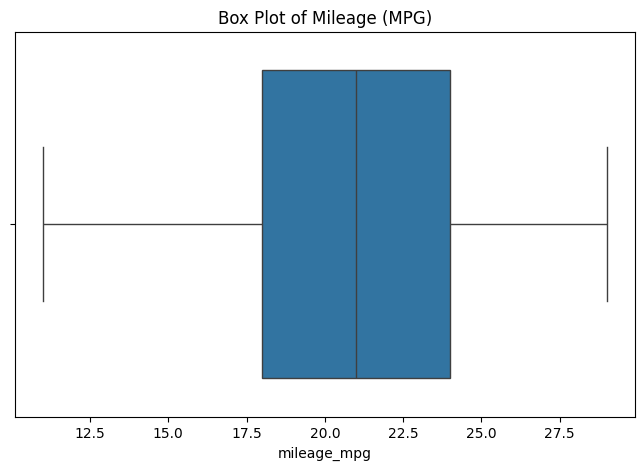

In [41]:

# Box Plot for Mileage
plt.figure(figsize=(8, 5))
sns.boxplot(x=trucks_df['mileage_mpg'])
plt.title('Box Plot of Mileage (MPG)')
plt.show()



Elements of the Box Plot:

Center Line: The horizontal line within the box represents the median mileage. This indicates that half of the trucks have gotten better gas mileage (more MPG) than this value and the other half have gotten lower mileage.

Box: The box represents the interquartile range (IQR), which encompasses the middle 50% of the mileage data. The height of the box reflects the spread of mileage within this middle range.

Whiskers: The lines extending from the box are the whiskers. They typically extend to the most extreme data points within 1.5 times the IQR from the median. Data points beyond the whiskers are considered outliers.

Outliers: Outliers are individual data points that fall outside the whiskers. These could represent trucks with significantly higher or lower mileage compared to the majority of trucks.

Observations from the Box Plot:

Center Line: The position of the center line along the y-axis indicates the typical mileage performance of the trucks in your fleet.
Box Height: The height of the box reflects how much variation there is in mileage among the middle 50% of trucks. A taller box suggests bigger differences in mileage within this middle range.
Whiskers: The length of the whiskers indicates how far the typical mileage data points are spread from the IQR. Short whiskers suggest that most trucks have gotten mileage close to the median and IQR.
Outliers: The presence of outliers (if any) can indicate trucks with exceptional mileage performance, either very high (potentially fuel-efficient) or very low (needing maintenance or being less efficient).

Interpretations:

By analyzing the relative positions of the center line, box, whiskers, and outliers, you can gain insights into:

The overall fuel efficiency of your truck fleet.
Whether there is a significant variation in mileage between trucks.
The presence of trucks with unusually high or low mileage that might require further investigation.

Further Analysis:

Comparison with Other Variables: Explore how mileage relates to other truck characteristics, such as truck age or load capacity. This can be done by creating separate box plots for different categories of these variables.
Identifying Factors: Analyze if there are any factors that might be affecting mileage, such as truck make or model, engine type, or maintenance records.

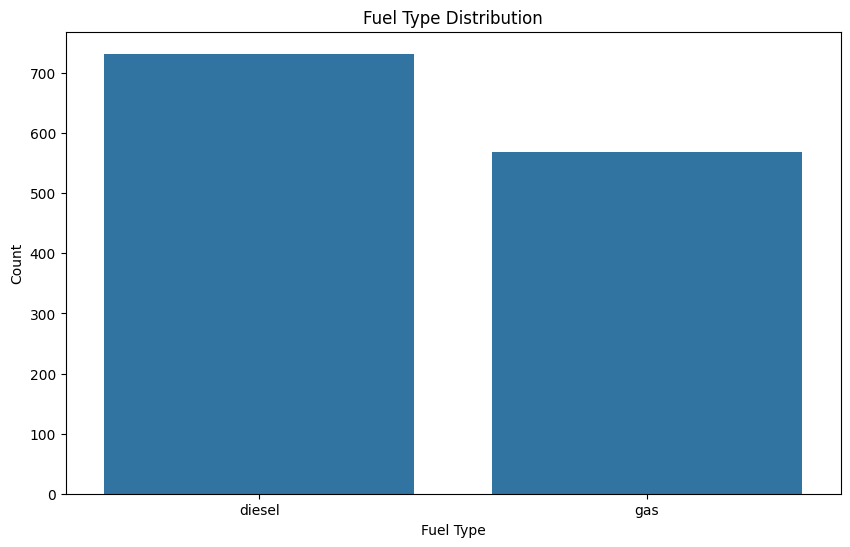

In [42]:
# Bar Plot for Fuel Type Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=trucks_df, x='fuel_type')
plt.title('Fuel Type Distribution')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()



Key Observations:

Fuel Types: Diesel and gas are the predominant fuel types.
Distribution: Diesel is more prevalent than gas.

Implications:

Fleet Composition: The majority of trucks are diesel-powered.
Fuel Efficiency: Diesel trucks might be more fuel-efficient.
Environmental Impact: Diesel trucks could have different environmental implications.

Further Analysis:

Fuel Efficiency Comparison: Quantify the difference in fuel consumption between diesel and gas trucks.
Operational Costs: Compare the costs associated with each fuel type, including fuel prices and maintenance.
Environmental Impact Assessment: Evaluate the environmental impact of both fuel types.

Recommendations:

Fleet Optimization: Based on truck age and mileage, consider a fleet review to determine if older trucks should be replaced or upgraded to improve efficiency.
Training Programs: If there are variations in mileage efficiency, training for drivers on fuel-efficient driving practices could be beneficial.
Sourcing Considerations: With insights into fuel type distribution, explore opportunities for transitioning to more eco-friendly alternatives or optimizing fuel sourcing strategies.
Capacity Management: If certain load capacities are underutilized, investigate whether there are inefficiencies in how trucks are assigned or utilized.

ROUTES


In [43]:
# Step 1: Login to Hopsworks
project = hopsworks.login()

# Step 2: Access the Feature Store
fs = project.get_feature_store()

# Step 3: Read Data from the Feature Group
routes_fg = fs.get_feature_group(name="routes", version=1)
routes_df = routes_fg.read()

# Step 4: Check the Data
print(routes_df.head(5))



Connection closed.
Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1043607
Connected. Call `.close()` to terminate connection gracefully.
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (0.89s) 
   index route_id   origin_id destination_id  distance  average_hours  \
0     47    Other  C-927ceb5e     C-e6dcda92    235.89           4.72   
1   1167    Other  C-6df8beaf     C-6ea51d66    905.45          18.11   
2   1969    Other  C-825b2625     C-927ceb5e    110.40           2.21   
3    682    Other  C-6ea51d66     C-a9f2c329    903.25          18.07   
4    286    Other  C-d80a1e7d     C-841ebdcb    871.28          17.43   

                 event_date  
0 2024-09-19 00:00:00+00:00  
1 2024-09-19 00:00:00+00:00  
2 2024-09-19 00:00:00+00:00  
3 2024-09-19 00:00:00+00:00  
4 2024-09-19 00:00:00+00:00  


In [44]:
routes_df.dtypes

index                           int64
route_id                       object
origin_id                      object
destination_id                 object
distance                      float64
average_hours                 float64
event_date        datetime64[us, UTC]
dtype: object

In [45]:
#Descriptive statistics

print(routes_df.describe())

             index     distance  average_hours
count  3620.000000  3620.000000    3620.000000
mean   1153.759669   991.080873      19.821680
std     676.457985   680.048957      13.600861
min       1.000000     3.900000       0.080000
25%     570.000000   442.120000       8.840000
50%    1178.500000   833.740000      16.670000
75%    1695.000000  1465.120000      29.300000
max    2352.000000  2995.850000      59.920000


Observations:

The average distance (mean) is approximately 991.08 km, and the average travel time is around 19.82 hours.
There is a significant range in both distance and travel hours, as indicated by the min and max values.
distance ranges from 3.9 km to 2995.85 km.
average_hours ranges from 0.08 hours (about 5 minutes) to nearly 60 hours.
The distribution of both distance and average_hours is quite spread out, indicated by the relatively high standard deviation.

Recommendation:

It's crucial to examine outliers, particularly for extremely short trips (less than 1 hour) or very long trips.

Histogram Plots for Numerical Values

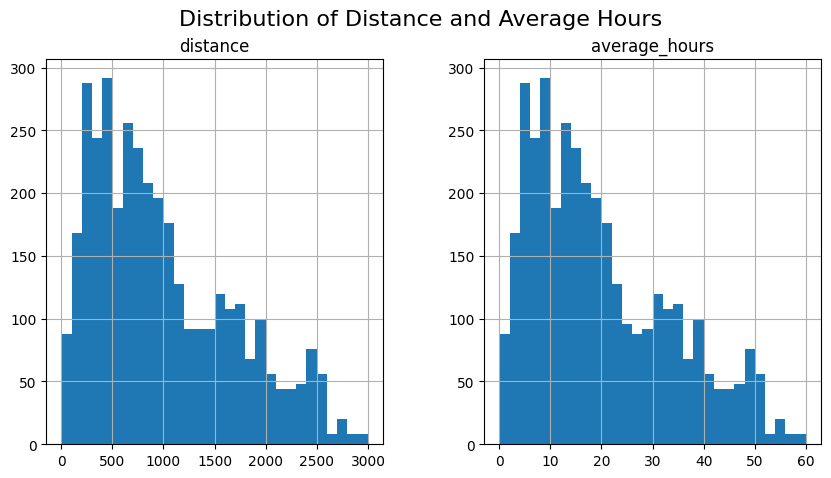

In [46]:
import matplotlib.pyplot as plt

routes_df[['distance', 'average_hours']].hist(bins=30, figsize=(10, 5))
plt.suptitle('Distribution of Distance and Average Hours', fontsize=16)
plt.show()


Observations:

Distance: We may observe a right-skewed distribution, indicating that most trips are shorter in distance, while there are fewer longer trips.
Average Hours: Similarly, we might see a right-skewed distribution here too, where most trips are shorter in duration.

Correlation Between Distance and Average Hours

In [47]:
routes_df[['distance', 'average_hours']].corr()


,distance,average_hours
distance,1.0,1.0
average_hours,1.0,1.0


Observations: A strong positive correlation between distance and average travel hours, as longer distances generally take more time to travel.

Recommendation:

If there are inconsistencies or weak correlation between distance and travel hours, further investigation may be needed to understand whether there are delays, traffic conditions, or other factors affecting travel time.

 Time-based Analysis


 Since the event_date column is available, we can explore how the average travel time changes over time (e.g., monthly or yearly trends).

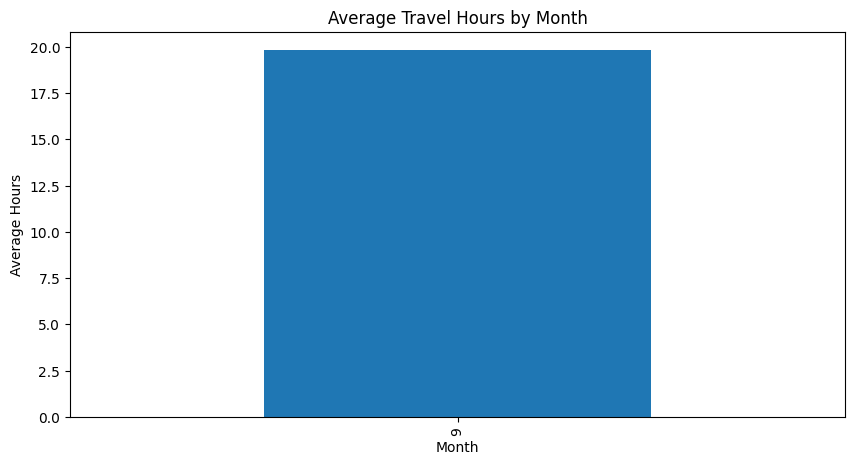

In [48]:
routes_df['event_month'] = routes_df['event_date'].dt.month
routes_df.groupby('event_month')['average_hours'].mean().plot(kind='bar', figsize=(10, 5))
plt.title('Average Travel Hours by Month')
plt.xlabel('Month')
plt.ylabel('Average Hours')
plt.show()


Observations:

This will reveal any seasonal patterns in travel time (e.g., delays during winter months due to adverse weather conditions).

 Outlier Detection
 
Potential outliers in distance and average_hours using boxplots:

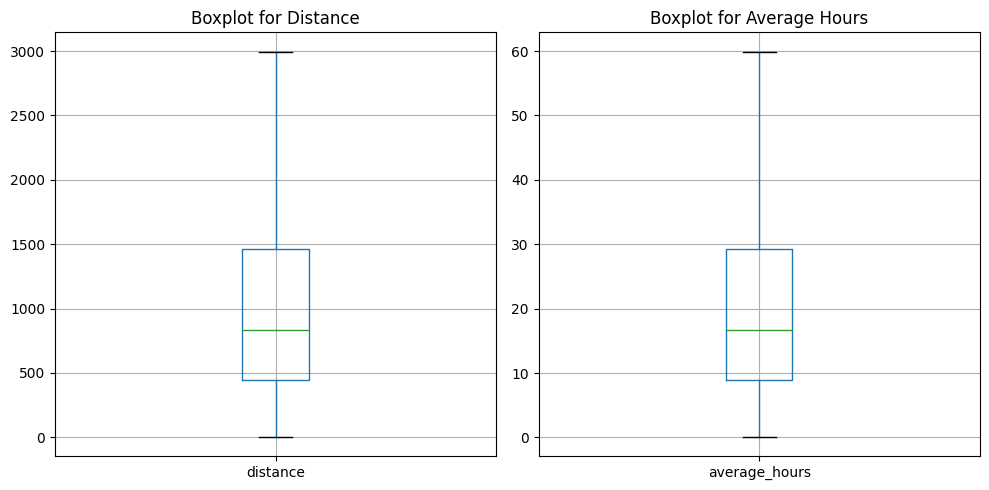

In [49]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
routes_df.boxplot(column=['distance'])
plt.title('Boxplot for Distance')

plt.subplot(1, 2, 2)
routes_df.boxplot(column=['average_hours'])
plt.title('Boxplot for Average Hours')

plt.tight_layout()
plt.show()


Observations:

Outliers in distance could represent edge cases or errors, such as trips being recorded incorrectly.
Outliers in travel hours could be caused by extreme traffic or weather events.

Final Recommendations:

Data Cleaning:

Investigate and possibly remove or adjust outliers, especially those involving very short or very long trips.
Ensure that distance and time data are consistent (e.g., very long trips with short distances might indicate data issues).

Feature Engineering:

Create additional features from the event_date (e.g., extracting day of the week, month, or year) to understand the temporal impact on travel time.
Look for relationships between the origin and destination IDs and travel time or distance. Grouping by routes might help identify inefficiencies.

Modeling:

Use the correlation between distance and average_hours as a baseline for predicting travel time based on distance.
For machine learning tasks, consider using distance and event-related features (e.g., time of day, day of the week) to predict delays.

Traffic

In [50]:
# Step 1: Login to Hopsworks
project = hopsworks.login()

# Step 2: Access the Feature Store
fs = project.get_feature_store()

# Step 3: Read Data from the Feature Group
traffic_fg = fs.get_feature_group(name="traffic", version=1)
traffic_df = traffic_fg.read()

# Step 4: Check the Data
print(traffic_df.head(5))



Connection closed.
Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1043607
Connected. Call `.close()` to terminate connection gracefully.
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (31.09s) 
     index    route_id                      date  hour  no_of_vehicles  \
0  2460948  R-af435402 2019-02-13 00:00:00+00:00   200           585.0   
1   845519  R-4870585f 2019-02-09 00:00:00+00:00  2200          2500.0   
2  1474720  R-4e1debbd 2019-02-06 00:00:00+00:00  1500          1576.0   
3   673124  R-e3ae8ddb 2019-02-02 00:00:00+00:00  1900          2133.0   
4  1393585  R-8a94b6f8 2019-01-15 00:00:00+00:00     0           516.0   

   accident                event_date  is_no_of_vehicles_missing  
0         0 2024-09-20 00:00:00+00:00                          0  
1         0 2024-09-20 00:00:00+00:00                          0  
2         0 2024-09-20 00:00:00+00:00     

In [51]:
traffic_df.info

<bound method DataFrame.info of            index    route_id                      date  hour  no_of_vehicles  \
0        2460948  R-af435402 2019-02-13 00:00:00+00:00   200           585.0   
1         845519  R-4870585f 2019-02-09 00:00:00+00:00  2200          2500.0   
2        1474720  R-4e1debbd 2019-02-06 00:00:00+00:00  1500          1576.0   
3         673124  R-e3ae8ddb 2019-02-02 00:00:00+00:00  1900          2133.0   
4        1393585  R-8a94b6f8 2019-01-15 00:00:00+00:00     0           516.0   
...          ...         ...                       ...   ...             ...   
5195821  1577227  R-471af254 2019-01-22 00:00:00+00:00   900          2371.0   
5195822  1831381  R-ba512bcb 2019-02-01 00:00:00+00:00   300           598.0   
5195823   545497  R-04ae9188 2019-01-06 00:00:00+00:00     0           483.0   
5195824  1665223  R-34abf26b 2019-01-08 00:00:00+00:00  2100          2515.0   
5195825  1113177  R-5f8bad59 2019-01-15 00:00:00+00:00   800          2113.0   

       

In [52]:
traffic_df.describe

<bound method NDFrame.describe of            index    route_id                      date  hour  no_of_vehicles  \
0        2460948  R-af435402 2019-02-13 00:00:00+00:00   200           585.0   
1         845519  R-4870585f 2019-02-09 00:00:00+00:00  2200          2500.0   
2        1474720  R-4e1debbd 2019-02-06 00:00:00+00:00  1500          1576.0   
3         673124  R-e3ae8ddb 2019-02-02 00:00:00+00:00  1900          2133.0   
4        1393585  R-8a94b6f8 2019-01-15 00:00:00+00:00     0           516.0   
...          ...         ...                       ...   ...             ...   
5195821  1577227  R-471af254 2019-01-22 00:00:00+00:00   900          2371.0   
5195822  1831381  R-ba512bcb 2019-02-01 00:00:00+00:00   300           598.0   
5195823   545497  R-04ae9188 2019-01-06 00:00:00+00:00     0           483.0   
5195824  1665223  R-34abf26b 2019-01-08 00:00:00+00:00  2100          2515.0   
5195825  1113177  R-5f8bad59 2019-01-15 00:00:00+00:00   800          2113.0   

     

In [53]:
traffic_df.dtypes

index                                      int64
route_id                                  object
date                         datetime64[us, UTC]
hour                                       int64
no_of_vehicles                           float64
accident                                   int64
event_date                   datetime64[us, UTC]
is_no_of_vehicles_missing                  int64
dtype: object

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# print(traffic_df.head())

# Define a function to categorize hours into time periods
def categorize_time(hour):
    if 300 <= hour < 600:
        return 'Early Morning'
    elif 600 <= hour < 1200:
        return 'Morning'
    elif 1200 <= hour < 1700:
        return 'Afternoon'
    elif 1700 <= hour < 2100:
        return 'Evening'
    else:
        return 'Night'

# Apply the function to create a new column 'time_period'
traffic_df['time_period'] = traffic_df['hour'].apply(categorize_time)

print(traffic_df)

   hour  no_of_vehicles    time_period
0   200           585.0          Night
1  2200          2500.0          Night
2  1500          1576.0      Afternoon
3  1900          2133.0        Evening
4     0           516.0          Night
5   900          2371.0        Morning
6   300           598.0  Early Morning
7   800          2113.0        Morning


2024-09-27 20:39:03,863 WARNING: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



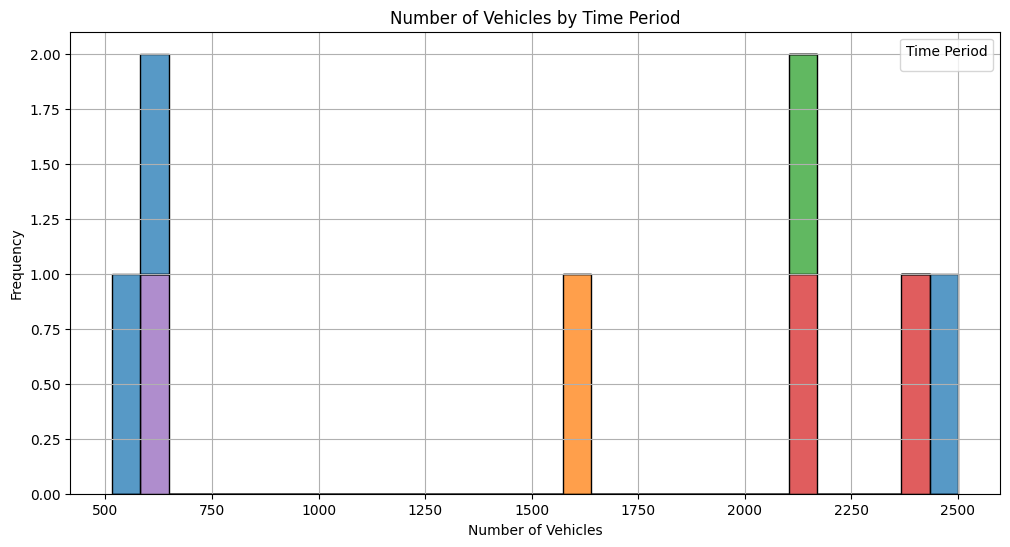

In [60]:
# Plotting the histogram for each time period
plt.figure(figsize=(12, 6))
sns.histplot(data=traffic_df, x='no_of_vehicles', hue='time_period', multiple='stack', bins=30)
plt.title('Number of Vehicles by Time Period')
plt.xlabel('Number of Vehicles')
plt.ylabel('Frequency')
plt.legend(title='Time Period')
plt.grid(True)
plt.show()


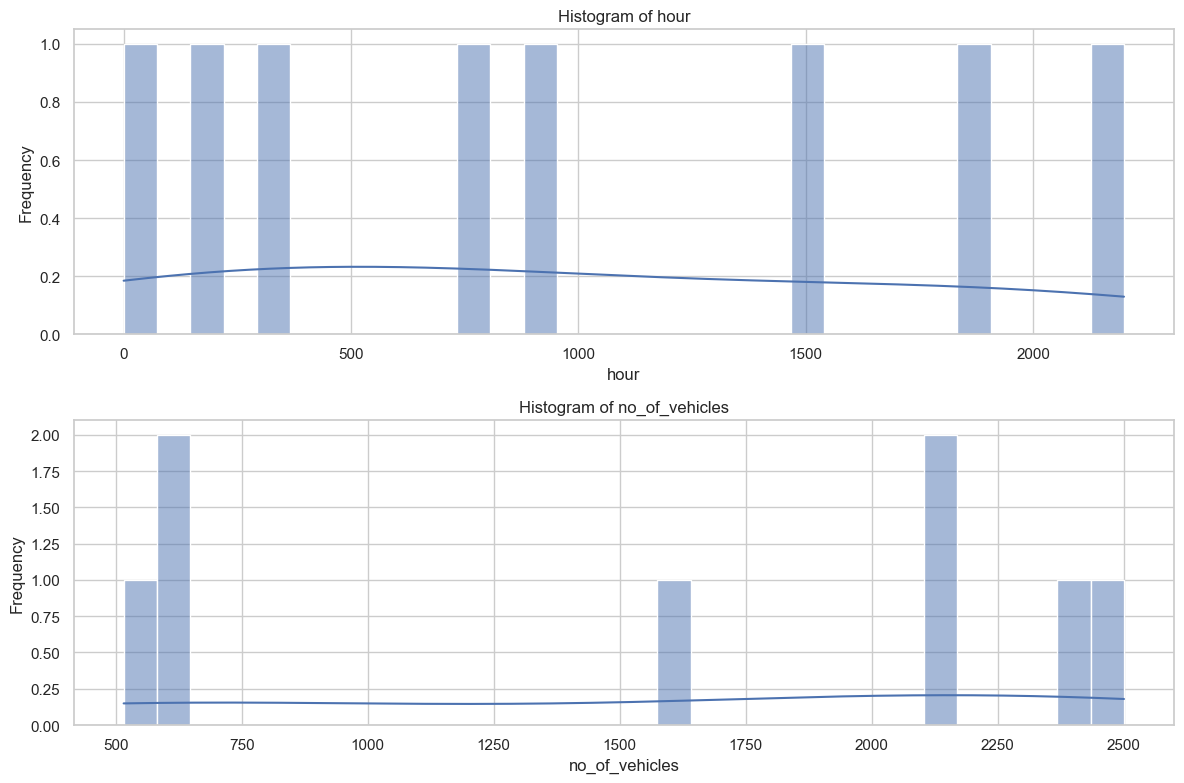

In [61]:
# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Define a function to plot histograms for numeric columns
def plot_histograms(df):
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    num_cols = len(numeric_cols)
    
    plt.figure(figsize=(12, 4 * num_cols))  # Adjust the figure size based on the number of numeric columns
    for i, col in enumerate(numeric_cols):
        plt.subplot(num_cols, 1, i + 1)  # Create a subplot for each numeric column
        sns.histplot(df[col], bins=30, kde=True)  # Plot histogram with Kernel Density Estimate (KDE)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.grid(True)
    
    plt.tight_layout()  # Adjust subplots to fit into the figure area
    plt.show()

# Call the function to plot histograms for traffic_df
plot_histograms(traffic_df)